## Explore eGrid

I'll begin with EDA of the eGrid dataset. I have eGrid data from 1996-2022 (not all years are included). Each year's data is stored in a excel separate file containing several sheets on different granularities: Unit, Generator, Plant, State, Balancing Authority, eGrid subregion, NERC region, and entire U.S. 

I would like to start by exploring the U.S. across the entire available time frame. I'll read in each file and proceed from there.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Start with most recent data file (2022) and oldest data file (1996). The naming convention for each dataframe will be df_{year}_{granularity}. For example, the U.S. data for 2022 will be df_2022_us.

In [2]:
df_2022_us = pd.read_excel('../data/egrid2022_data.xlsx', sheet_name='US22')
df_2022_us.head()

,Data Year,U.S. nameplate capacity (MW),U.S. annual heat input from combustion (MMBtu),U.S. ozone season heat input from combustion (MMBtu),U.S. total annual heat input (MMBtu),U.S. total ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),...,U.S. nonbaseload oil generation percent (resource mix),U.S. nonbaseload gas generation percent (resource mix),U.S. nonbaseload nuclear generation percent (resource mix),U.S. nonbaseload hydro generation percent (resource mix),U.S. nonbaseload biomass generation percent (resource mix),U.S. nonbaseload wind generation percent (resource mix),U.S. nonbaseload solar generation percent (resource mix),U.S. nonbaseload geothermal generation percent (resource mix),U.S. nonbaseload other fossil generation percent (resource mix),U.S. nonbaseload other unknown/ purchased fuel generation percent (resource mix)
0,YEAR,USNAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
1,2022,1281209.4,22849711441.064999,10802614689.264999,25763625697.980999,12001451998.285,4240140532.692,1912186735.104,1067556.819,464171.27,...,0.01538,0.613966,0,0,0.016774,0,0,0,0.002394,0


Only 2 rows. The first row seems to be a more appropriate column name while the current column is a description of the data value. The value for US is in row 1.

In [3]:
df_1996_us = pd.read_excel('../data/egrid_historical_files_1996-2016/egrid1996_location.xls', sheet_name='EGRDUS96')
df_1996_us.head()

,eGRID2002 Version 2.01 U.S. File (Year 1996 Data),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93
0,"For further description of variables, see eGRI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEQUS00\neGRID2002 2000 file U.S. sequence number,SEQUS99\neGRID2002 1999 file U.S. sequence number,USNAME\nUnited States name,NAMEPCAP\nU.S. capacity (MW),USHTIAN\nU.S. 1996 annual heat input (MMBtu),USHTIOZ\nU.S. 1996 ozone season heat input (MM...,USNGENAN\nU.S. 1996 annual net generation (MWh),USNGENOZ\nU.S. 1996 ozone season net generatio...,USNOXAN\nU.S. 1996 annual NOx emissions (tons),USNOXOZ\nU.S. 1996 ozone season NOx emissions ...,...,"USOFPR\nU.S. 1996 other fossil (tires, batteri...",USSWPR\nU.S. 1996 solid waste generation perce...,USFSPR\nU.S. 1996 unspecified fossil generatio...,USRWPR\nU.S. 1996 unspecified renewable genera...,USTNPR\nU.S. 1996 total nonrenewables generati...,USTRPR\nU.S. 1996 total renewables generation ...,USTHPR\nU.S. 1996 total nonhydro renewables ge...,SEQUS96\neGRID96 1996 file U.S. sequence number,SEQUS97\neGRID97 1997 file U.S. sequence number,SEQUS98\neGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,834337.01,27070336710,11279306961,3455700615.4,1511813007.4,6834853,2848540,...,NaN,0.0341,8.0399,2.0884,87.6574,12.2233,2.2972,1,1,1


The 1996 U.S. data is in a sligthly different format and I imagine some of the older files will follow this convention. Only 94 columns vs 162 for the more recent data. To analyze the years together I'll want a similar format.

Row 2 of 1996 has the column names and descriptions separates by a newline character. I'll split these and set appropriate column names.

In [4]:
col_names = [v[0] for v in df_1996_us.iloc[2].str.split('\n')]
col_names

['SEQUS00',
 'SEQUS99',
 'USNAME',
 'NAMEPCAP',
 'USHTIAN',
 'USHTIOZ',
 'USNGENAN',
 'USNGENOZ',
 'USNOXAN',
 'USNOXOZ',
 'USSO2AN',
 'USCO2AN',
 'USHGAN',
 'USNOXRTA',
 'USNOXRTO',
 'USSO2RTA',
 'USCO2RTA',
 'USHGRTA',
 'USNOXRA',
 'USNOXRO',
 'USSO2RA',
 'USCO2RA',
 'USHGRA',
 'USCNOXRT',
 'USONOXRT',
 'USGNOXRT',
 'USFSNXRT',
 'USCNXORT',
 'USONXORT',
 'USGNXORT',
 'USFSNORT',
 'USCSO2RT',
 'USOSO2RT',
 'USGSO2RT',
 'USFSS2RT',
 'USCCO2RT',
 'USOCO2RT',
 'USGCO2RT',
 'USFSC2RT',
 'USCHGRT',
 'USFSHGRT',
 'USCNOXR',
 'USONOXR',
 'USGNOXR',
 'USFSNXR',
 'USCNXOR',
 'USONXOR',
 'USGNXOR',
 'USFSNOR',
 'USCSO2R',
 'USOSO2R',
 'USGSO2R',
 'USFSS2R',
 'USCCO2R',
 'USOCO2R',
 'USGCO2R',
 'USFSC2R',
 'USCHGR',
 'USFSHGR',
 'USGENACL',
 'USGENAOL',
 'USGENAGS',
 'USGENANC',
 'USGENAHY',
 'USGENABM',
 'USGENAWI',
 'USGENASO',
 'USGENAGT',
 'USGENAOF',
 'USGENASW',
 'USGENAFS',
 'USGENARW',
 'USGENATN',
 'USGENATR',
 'USGENATH',
 'USCLPR',
 'USOLPR',
 'USGSPR',
 'USNCPR',
 'USHYPR',
 'USBMPR'

In [5]:
col_desc = [v[1] for v in df_1996_us.iloc[2].str.split('\n')]
col_desc

['eGRID2002 2000 file U.S. sequence number',
 'eGRID2002 1999 file U.S. sequence number',
 'United States name',
 'U.S. capacity (MW)',
 'U.S. 1996 annual heat input (MMBtu)',
 'U.S. 1996 ozone season heat input (MMBtu)',
 'U.S. 1996 annual net generation (MWh)',
 'U.S. 1996 ozone season net generation (MWh)',
 'U.S. 1996 annual NOx emissions (tons)',
 'U.S. 1996 ozone season NOx emissions (tons)',
 'U.S. 1996 annual SO2 emissions (tons)',
 'U.S. 1996 annual CO2 emissions (tons)',
 'U.S. 1996 annual mercury emissions (lbs)',
 'U.S. average 1996 annual NOx output emission rate (lbs/MWh)',
 'U.S. average 1996 ozone season NOx output emission rate (lbs/MWh)',
 'U.S. average 1996 annual SO2 output emission rate (lbs/MWh)',
 'U.S. average 1996 annual CO2 output emission rate (lbs/MWh)',
 'U.S. average 1996 annual mercury output emission rate (lbs/GWh)',
 'U.S. average 1996 annual NOx input emission rate (lbs/MMBtu)',
 'U.S. average 1996 ozone season NOx input emission rate (lbs/MMBtu)',
 'U

In [6]:
df_1996_us.columns = col_names
df_1996_us.head()

,SEQUS00,SEQUS99,USNAME,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USOFPR,USSWPR,USFSPR,USRWPR,USTNPR,USTRPR,USTHPR,SEQUS96,SEQUS97,SEQUS98
0,"For further description of variables, see eGRI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEQUS00\neGRID2002 2000 file U.S. sequence number,SEQUS99\neGRID2002 1999 file U.S. sequence number,USNAME\nUnited States name,NAMEPCAP\nU.S. capacity (MW),USHTIAN\nU.S. 1996 annual heat input (MMBtu),USHTIOZ\nU.S. 1996 ozone season heat input (MM...,USNGENAN\nU.S. 1996 annual net generation (MWh),USNGENOZ\nU.S. 1996 ozone season net generatio...,USNOXAN\nU.S. 1996 annual NOx emissions (tons),USNOXOZ\nU.S. 1996 ozone season NOx emissions ...,...,"USOFPR\nU.S. 1996 other fossil (tires, batteri...",USSWPR\nU.S. 1996 solid waste generation perce...,USFSPR\nU.S. 1996 unspecified fossil generatio...,USRWPR\nU.S. 1996 unspecified renewable genera...,USTNPR\nU.S. 1996 total nonrenewables generati...,USTRPR\nU.S. 1996 total renewables generation ...,USTHPR\nU.S. 1996 total nonhydro renewables ge...,SEQUS96\neGRID96 1996 file U.S. sequence number,SEQUS97\neGRID97 1997 file U.S. sequence number,SEQUS98\neGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,834337.01,27070336710,11279306961,3455700615.4,1511813007.4,6834853,2848540,...,NaN,0.0341,8.0399,2.0884,87.6574,12.2233,2.2972,1,1,1


In [7]:
df_1996_us.iloc[0] = col_desc
df_1996_us

,SEQUS00,SEQUS99,USNAME,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USOFPR,USSWPR,USFSPR,USRWPR,USTNPR,USTRPR,USTHPR,SEQUS96,SEQUS97,SEQUS98
0,eGRID2002 2000 file U.S. sequence number,eGRID2002 1999 file U.S. sequence number,United States name,U.S. capacity (MW),U.S. 1996 annual heat input (MMBtu),U.S. 1996 ozone season heat input (MMBtu),U.S. 1996 annual net generation (MWh),U.S. 1996 ozone season net generation (MWh),U.S. 1996 annual NOx emissions (tons),U.S. 1996 ozone season NOx emissions (tons),...,"U.S. 1996 other fossil (tires, batteries, chem...",U.S. 1996 solid waste generation percent (reso...,U.S. 1996 unspecified fossil generation percen...,U.S. 1996 unspecified renewable generation per...,U.S. 1996 total nonrenewables generation perce...,U.S. 1996 total renewables generation percent ...,U.S. 1996 total nonhydro renewables generation...,eGRID96 1996 file U.S. sequence number,eGRID97 1997 file U.S. sequence number,eGRID2000 1998 file U.S. sequence number
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEQUS00\neGRID2002 2000 file U.S. sequence number,SEQUS99\neGRID2002 1999 file U.S. sequence number,USNAME\nUnited States name,NAMEPCAP\nU.S. capacity (MW),USHTIAN\nU.S. 1996 annual heat input (MMBtu),USHTIOZ\nU.S. 1996 ozone season heat input (MM...,USNGENAN\nU.S. 1996 annual net generation (MWh),USNGENOZ\nU.S. 1996 ozone season net generatio...,USNOXAN\nU.S. 1996 annual NOx emissions (tons),USNOXOZ\nU.S. 1996 ozone season NOx emissions ...,...,"USOFPR\nU.S. 1996 other fossil (tires, batteri...",USSWPR\nU.S. 1996 solid waste generation perce...,USFSPR\nU.S. 1996 unspecified fossil generatio...,USRWPR\nU.S. 1996 unspecified renewable genera...,USTNPR\nU.S. 1996 total nonrenewables generati...,USTRPR\nU.S. 1996 total renewables generation ...,USTHPR\nU.S. 1996 total nonhydro renewables ge...,SEQUS96\neGRID96 1996 file U.S. sequence number,SEQUS97\neGRID97 1997 file U.S. sequence number,SEQUS98\neGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,834337.01,27070336710,11279306961,3455700615.4,1511813007.4,6834853,2848540,...,NaN,0.0341,8.0399,2.0884,87.6574,12.2233,2.2972,1,1,1


In [8]:
df_1996_us = df_1996_us.drop([1, 2])
df_1996_us

,SEQUS00,SEQUS99,USNAME,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USOFPR,USSWPR,USFSPR,USRWPR,USTNPR,USTRPR,USTHPR,SEQUS96,SEQUS97,SEQUS98
0,eGRID2002 2000 file U.S. sequence number,eGRID2002 1999 file U.S. sequence number,United States name,U.S. capacity (MW),U.S. 1996 annual heat input (MMBtu),U.S. 1996 ozone season heat input (MMBtu),U.S. 1996 annual net generation (MWh),U.S. 1996 ozone season net generation (MWh),U.S. 1996 annual NOx emissions (tons),U.S. 1996 ozone season NOx emissions (tons),...,"U.S. 1996 other fossil (tires, batteries, chem...",U.S. 1996 solid waste generation percent (reso...,U.S. 1996 unspecified fossil generation percen...,U.S. 1996 unspecified renewable generation per...,U.S. 1996 total nonrenewables generation perce...,U.S. 1996 total renewables generation percent ...,U.S. 1996 total nonhydro renewables generation...,eGRID96 1996 file U.S. sequence number,eGRID97 1997 file U.S. sequence number,eGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,834337.01,27070336710,11279306961,3455700615.4,1511813007.4,6834853,2848540,...,NaN,0.0341,8.0399,2.0884,87.6574,12.2233,2.2972,1,1,1


I want to switch column names and first row of df_2022_us as well

In [9]:
df_2022_us

,Data Year,U.S. nameplate capacity (MW),U.S. annual heat input from combustion (MMBtu),U.S. ozone season heat input from combustion (MMBtu),U.S. total annual heat input (MMBtu),U.S. total ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),...,U.S. nonbaseload oil generation percent (resource mix),U.S. nonbaseload gas generation percent (resource mix),U.S. nonbaseload nuclear generation percent (resource mix),U.S. nonbaseload hydro generation percent (resource mix),U.S. nonbaseload biomass generation percent (resource mix),U.S. nonbaseload wind generation percent (resource mix),U.S. nonbaseload solar generation percent (resource mix),U.S. nonbaseload geothermal generation percent (resource mix),U.S. nonbaseload other fossil generation percent (resource mix),U.S. nonbaseload other unknown/ purchased fuel generation percent (resource mix)
0,YEAR,USNAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
1,2022,1281209.4,22849711441.064999,10802614689.264999,25763625697.980999,12001451998.285,4240140532.692,1912186735.104,1067556.819,464171.27,...,0.01538,0.613966,0,0,0.016774,0,0,0,0.002394,0


In [10]:
temp = df_2022_us.columns
temp

Index(['Data Year', 'U.S. nameplate capacity (MW)',
       'U.S. annual heat input from combustion (MMBtu)',
       'U.S. ozone season heat input from combustion (MMBtu)',
       'U.S. total annual heat input (MMBtu)',
       'U.S. total ozone season heat input (MMBtu)',
       'U.S. annual net generation (MWh)',
       'U.S. ozone season net generation (MWh)',
       'U.S. annual NOx emissions (tons)',
       'U.S. ozone season NOx emissions (tons)',
       ...
       'U.S. nonbaseload oil generation percent (resource mix)',
       'U.S. nonbaseload gas generation percent (resource mix)',
       'U.S. nonbaseload nuclear generation percent (resource mix)',
       'U.S. nonbaseload hydro generation percent (resource mix)',
       'U.S. nonbaseload biomass generation percent (resource mix)',
       'U.S. nonbaseload wind generation percent (resource mix)',
       'U.S. nonbaseload solar generation percent (resource mix)',
       'U.S. nonbaseload geothermal generation percent (resource 

In [11]:
df_2022_us.columns = df_2022_us.iloc[0].copy()

In [12]:
df_2022_us

,YEAR,USNAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
0,YEAR,USNAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
1,2022,1281209.4,22849711441.064999,10802614689.264999,25763625697.980999,12001451998.285,4240140532.692,1912186735.104,1067556.819,464171.27,...,0.01538,0.613966,0,0,0.016774,0,0,0,0.002394,0


In [13]:
df_2022_us.iloc[0] = temp

In [14]:
df_2022_us

,YEAR,USNAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
0,Data Year,U.S. nameplate capacity (MW),U.S. annual heat input from combustion (MMBtu),U.S. ozone season heat input from combustion (...,U.S. total annual heat input (MMBtu),U.S. total ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),...,U.S. nonbaseload oil generation percent (resou...,U.S. nonbaseload gas generation percent (resou...,U.S. nonbaseload nuclear generation percent (r...,U.S. nonbaseload hydro generation percent (res...,U.S. nonbaseload biomass generation percent (r...,U.S. nonbaseload wind generation percent (reso...,U.S. nonbaseload solar generation percent (res...,U.S. nonbaseload geothermal generation percent...,U.S. nonbaseload other fossil generation perce...,U.S. nonbaseload other unknown/ purchased fuel...
1,2022,1281209.4,22849711441.064999,10802614689.264999,25763625697.980999,12001451998.285,4240140532.692,1912186735.104,1067556.819,464171.27,...,0.01538,0.613966,0,0,0.016774,0,0,0,0.002394,0


Proceed with rest of files. Create a function to perform operations above. Files following format similar to 1996 will be handled with `format_historical_df` and the rest with `format_df`.

In [15]:
def format_historical_df(df):
    '''
    Accepts a dataframe. Splits column name and description in second row. Set column name.
    Store description in first row. Drop irrelevant rows. Return formatted dataframe
    '''

    col_names = [v[0] for v in df.iloc[2].str.split('\n')]
    col_desc = [v[1] for v in df.iloc[2].str.split('\n')]

    df.columns = col_names
    df.iloc[0] = col_desc

    df = df.drop([1, 2])

    return df.reset_index(drop=True)

In [16]:
def format_df(df):
    '''
    Accepts dataframe. Switches column name and description from first row.
    '''

    temp = df.columns
    df.columns = df.iloc[0].copy()
    df.iloc[0] = temp

    return df.reset_index(drop=True)

Read in remaining files on U.S. data

In [17]:
df_1997_us = pd.read_excel('../data/egrid_historical_files_1996-2016/eGRID1997_location.xls', sheet_name='EGRDUS97')
df_1997_us

,eGRID2002 Version 2.01 U.S. File (Year 1997 Data),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93
0,"For further description of variables, see eGRI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEQUS00\neGRID2002 2000 file U.S. sequence number,SEQUS99\neGRID2002 1999 file U.S. sequence number,USNAME\nUnited States name,NAMEPCAP\nU.S. capacity (MW),USHTIAN\nU.S. 1997 annual heat input (MMBtu),USHTIOZ\nU.S. 1997 ozone season heat input (MM...,USNGENAN\nU.S. 1997 annual net generation (MWh),USNGENOZ\nU.S. 1997 ozone season net generatio...,USNOXAN\nU.S. 1997 annual NOx emissions (tons),USNOXOZ\nU.S. 1997 ozone season NOx emissions ...,...,"USOFPR\nU.S. 1997 other fossil (tires, batteri...",USSWPR\nU.S. 1997 solid waste generation perce...,USFSPR\nU.S. 1997 unspecified fossil generatio...,USRWPR\nU.S. 1997 unspecified renewable genera...,USTNPR\nU.S. 1997 total nonrenewables generati...,USTRPR\nU.S. 1997 total renewables generation ...,USTHPR\nU.S. 1997 total nonhydro renewables ge...,SEQUS96\neGRID96 1996 file U.S. sequence number,SEQUS97\neGRID97 1997 file U.S. sequence number,SEQUS98\neGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,844172.7403,28062882446.700001,11692867684.6,3499073904.1,1533195829.1,6862784.941,2918489.908,...,NaN,0.0358,8.1936,1.9547,87.746,12.2538,2.1677,1,1,1


I'd like to perform this more programatically. All files are stored in the `data` directory. All files before 2016 are in the subfolder `egrid_historical_files_1996_2016`. The naming convention is eGrid{year}_{name}.xls. Name is either location, aggregation, or data depending on the year and the file format is .xlsx for later years. The sheet names can vary slightly but all should contain 'US' and the corresponding year to the file. 

- Gather all file names and corresponding paths
- Store file name and dictionary with the year as the key
- Explore sheet names for each file and select approprate sheet (containing U.S.)
- Read data to dataframe with approprate naming convention
- Check format and pass to approprate function

In [18]:
file_dict = {}

In [19]:
for root, dirs, files in os.walk('../data/'):
    for file in files:
        if ('location' in file or 'aggregation' in file or 'data' in file or 'Data' in file) and\
            ('copy' not in file and 'metric' not in file):
            # Extract the year from the file name
            year = file[5:9]
            # Construct the file path
            file_path = os.path.join(root, file)
            # Add the file path to the dictionary with the year as the key
            file_dict[year] = file_path

In [20]:
file_dict

{'2021': '../data/eGRID2021_data.xlsx',
 '2019': '../data/egrid2019_data.xlsx',
 '2020': '../data/eGRID2020_Data_v2.xlsx',
 '2018': '../data/egrid2018_data_v2.xlsx',
 '2022': '../data/egrid2022_data.xlsx',
 '2012': '../data/egrid_historical_files_1996-2016/eGRID2012_Data.xlsx',
 '2000': '../data/egrid_historical_files_1996-2016/eGRID2000_location.xls',
 '2007': '../data/egrid_historical_files_1996-2016/eGRID2007_aggregation.xls',
 '1998': '../data/egrid_historical_files_1996-2016/eGRID1998_location.xls',
 '1999': '../data/egrid_historical_files_1996-2016/eGRID1999_location.xls',
 '2010': '../data/egrid_historical_files_1996-2016/eGRID2010_Data.xls',
 '2009': '../data/egrid_historical_files_1996-2016/eGRID2009_data.xls',
 '2016': '../data/egrid_historical_files_1996-2016/egrid2016_data.xlsx',
 '2004': '../data/egrid_historical_files_1996-2016/eGRID2004_aggregation.xls',
 '2014': '../data/egrid_historical_files_1996-2016/eGRID2014_Data_v2.xlsx',
 '1997': '../data/egrid_historical_files_1

Thank you GPT for helping me write code above. Now I want to order by year

In [21]:
file_dict = dict(sorted(file_dict.items()))

Next I will go through each file, select approprate sheet name and read the dataframe into a dictionary.

In [22]:
df_dict = {}

# Iterate over the dictionary of file paths
for year, file_path in file_dict.items():
    # Read the Excel file into a pandas DataFrame
    xl = pd.ExcelFile(file_path)
    # Initialize sheet_data to None initially
    sheet_data = None
    # Iterate over each sheet name
    for sheet_name in xl.sheet_names:
        # Check if the sheet name contains "US"
        if "US" in sheet_name:
            # Read the first sheet containing "US" into a pandas DataFrame
            sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)
            # Break the loop once the sheet is found
            break
    # Store the sheet data in the selected_data dictionary with the same key as the original file dictionary
    df_dict[year] = sheet_data

In [23]:
df_dict['1997']

,eGRID2002 Version 2.01 U.S. File (Year 1997 Data),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93
0,"For further description of variables, see eGRI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEQUS00\neGRID2002 2000 file U.S. sequence number,SEQUS99\neGRID2002 1999 file U.S. sequence number,USNAME\nUnited States name,NAMEPCAP\nU.S. capacity (MW),USHTIAN\nU.S. 1997 annual heat input (MMBtu),USHTIOZ\nU.S. 1997 ozone season heat input (MM...,USNGENAN\nU.S. 1997 annual net generation (MWh),USNGENOZ\nU.S. 1997 ozone season net generatio...,USNOXAN\nU.S. 1997 annual NOx emissions (tons),USNOXOZ\nU.S. 1997 ozone season NOx emissions ...,...,"USOFPR\nU.S. 1997 other fossil (tires, batteri...",USSWPR\nU.S. 1997 solid waste generation perce...,USFSPR\nU.S. 1997 unspecified fossil generatio...,USRWPR\nU.S. 1997 unspecified renewable genera...,USTNPR\nU.S. 1997 total nonrenewables generati...,USTRPR\nU.S. 1997 total renewables generation ...,USTHPR\nU.S. 1997 total nonhydro renewables ge...,SEQUS96\neGRID96 1996 file U.S. sequence number,SEQUS97\neGRID97 1997 file U.S. sequence number,SEQUS98\neGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,844172.7403,28062882446.700001,11692867684.6,3499073904.1,1533195829.1,6862784.941,2918489.908,...,NaN,0.0358,8.1936,1.9547,87.746,12.2538,2.1677,1,1,1


In [24]:
df_dict['2021']

,Data Year,U.S. nameplate capacity (MW),U.S. annual heat input from combustion (MMBtu),U.S. ozone season heat input from combustion (MMBtu),U.S. total annual heat input (MMBtu),U.S. total ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),...,U.S. nonbaseload oil generation percent (resource mix),U.S. nonbaseload gas generation percent (resource mix),U.S. nonbaseload nuclear generation percent (resource mix),U.S. nonbaseload hydro generation percent (resource mix),U.S. nonbaseload biomass generation percent (resource mix),U.S. nonbaseload wind generation percent (resource mix),U.S. nonbaseload solar generation percent (resource mix),U.S. nonbaseload geothermal generation percent (resource mix),U.S. nonbaseload other fossil generation percent (resource mix),U.S. nonbaseload other unknown/ purchased fuel generation percent (resource mix)
0,YEAR,USNAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
1,2021,1258286,22542508669.201,10780196178.726,29315748725.673,13537171532.598,4120144619.358,1866124658.226,1080607.792,489928.882,...,0.014795,0.592567,0,0,0.016064,0,0,0,0.002234,0


Now I want to format the dataframes. If a dataframe has 4 rows it can be considered "historical". Double check all dataframes have either 2 or 4 rows.

In [25]:
for year, d in df_dict.items():
    print(year, d.shape)

1996 (4, 94)
1997 (4, 94)
1998 (4, 94)
1999 (4, 94)
2000 (4, 94)
2004 (5, 90)
2005 (5, 107)
2007 (5, 109)
2009 (5, 109)
2010 (5, 109)
2012 (5, 109)
2014 (4, 110)
2016 (2, 111)
2018 (2, 161)
2019 (2, 162)
2020 (2, 162)
2021 (2, 162)
2022 (2, 162)


Some years have five

In [26]:
df_dict['2004']

,eGRID2006 Version 2.1 United States File (Year 2004 Data),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,This United States file has 1 record and 90 da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eGRID2006 2004 file US sequence number,US nameplate capacity (MW),US annual heat input (MMBtu),US ozone season heat input (MMBtu),US annual net generation (MWh),US ozone season net generation (MWh),US annual NOx emissions (tons),US ozone season NOx emissions (tons),US annual SO2 emissions (tons),US annual CO2 emissions (tons),...,US hydro generation percent (resource mix),US biomass/ wood generation percent (resource ...,US wind generation percent (resource mix),US solar generation percent (resource mix),US geothermal generation percent (resource mix),"US other fossil (tires, batteries, chemicals, ...",US other unknown/purchased fuel generation per...,US total nonrenewables generation percent (res...,US total renewables generation percent (resour...,US total nonhydro renewables generation percen...
3,SEQUS04,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,USSO2AN,USCO2AN,...,USHYPR,USBMPR,USWIPR,USSOPR,USGTPR,USOFPR,USOPPR,USTNPR,USTRPR,USTHPR
4,1,1052996.1,29991901081.400002,13360057962.9,3935071766.2,1738793154,4138481.3233,1481549.5211,10695446.2744,2681753802.98,...,6.5835,1.4327,0.3429,0.0146,0.3463,0.4869,0.1139,91.2799,8.7201,2.1366


In [27]:
df_dict['2012']

,eGRID2012 United States File,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108
0,This United States file has 1 record and 109 d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eGRID2012 file U.S. sequence number,U.S. nameplate capacity (MW),U.S. annual heat input (MMBtu),U.S. ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),U.S. annual SO2 emissions (tons),U.S. annual CO2 emissions (tons),...,U.S. wind generation percent (resource mix),U.S. solar generation percent (resource mix),U.S. geothermal generation percent (resource mix),U.S. other fossil generation percent (resource...,U.S. other unknown/ purchased fuel generation ...,U.S. total nonrenewables generation percent (r...,U.S. total renewables generation percent (reso...,U.S. total nonhydro renewables generation perc...,U.S. total combustion generation percent (reso...,U.S. total noncombustion generation percent (r...
3,SEQUS12,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,USSO2AN,USCO2AN,...,USWIPR,USSOPR,USGTPR,USOFPR,USOPPR,USTNPR,USTRPR,USTHPR,USCYPR,USCNPR
4,1,1309394.6,26820073797.080128,12638695177.892195,4045517914.744402,1843039497.338088,1913686.858242,871745.091982,3817422.302762,2298924483.354739,...,3.447626,0.103535,0.384244,0.368294,0.122138,87.921234,12.078766,5.375787,70.171273,29.655263


2004-2012 are formatted differently than the earlier and later years.

In [28]:
df_dict['1996']

,eGRID2002 Version 2.01 U.S. File (Year 1996 Data),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93
0,"For further description of variables, see eGRI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEQUS00\neGRID2002 2000 file U.S. sequence number,SEQUS99\neGRID2002 1999 file U.S. sequence number,USNAME\nUnited States name,NAMEPCAP\nU.S. capacity (MW),USHTIAN\nU.S. 1996 annual heat input (MMBtu),USHTIOZ\nU.S. 1996 ozone season heat input (MM...,USNGENAN\nU.S. 1996 annual net generation (MWh),USNGENOZ\nU.S. 1996 ozone season net generatio...,USNOXAN\nU.S. 1996 annual NOx emissions (tons),USNOXOZ\nU.S. 1996 ozone season NOx emissions ...,...,"USOFPR\nU.S. 1996 other fossil (tires, batteri...",USSWPR\nU.S. 1996 solid waste generation perce...,USFSPR\nU.S. 1996 unspecified fossil generatio...,USRWPR\nU.S. 1996 unspecified renewable genera...,USTNPR\nU.S. 1996 total nonrenewables generati...,USTRPR\nU.S. 1996 total renewables generation ...,USTHPR\nU.S. 1996 total nonhydro renewables ge...,SEQUS96\neGRID96 1996 file U.S. sequence number,SEQUS97\neGRID97 1997 file U.S. sequence number,SEQUS98\neGRID2000 1998 file U.S. sequence number
3,NaN,NaN,UNITED STATES,834337.01,27070336710,11279306961,3455700615.4,1511813007.4,6834853,2848540,...,NaN,0.0341,8.0399,2.0884,87.6574,12.2233,2.2972,1,1,1


In [29]:
df_dict['2018']

,Data Year,U.S. nameplate capacity (MW),U.S. annual heat input from combustion (MMBtu),U.S. ozone season heat input from combustion (MMBtu),U.S. total annual heat input (MMBtu),U.S. total ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),...,U.S. nonbaseload oil generation percent (resource mix),U.S. nonbaseload gas generation percent (resource mix),U.S. nonbaseload nuclear generation percent (resource mix),U.S. nonbaseload hydro generation percent (resource mix),U.S. nonbaseload biomass generation percent (resource mix),U.S. nonbaseload wind generation percent (resource mix),U.S. nonbaseload solar generation percent (resource mix),U.S. nonbaseload geothermal generation percent (resource mix),U.S. nonbaseload other fossil generation percent (resource mix),U.S. nonbaseload other unknown/ purchased fuel generation percent (resource mix)
0,YEAR,NAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
1,2018,1561642.9,24435153263.558998,11500998259.459999,38781301841.663002,17566867584.515999,4168370117.666,1884155928.821,1289517.488,546133.456,...,0.014571,0.560394,0,0,0.017647,0,0,0,0.003403,0


1996-2000: `format_historical_df`
2004-2012: `format_mid_df`
2016-2023: `format_df`

In [30]:
def format_mid_df(df):  
    '''
    Accepts dataframe. Sets column names to third row. Drops unnecessary rows.
    '''  

    df.columns = df.iloc[3]
    df = df.drop([0, 1, 3])

    return df.reset_index(drop=True)

In [31]:
df_dict_formatted = {}
for year in df_dict:
    if int(year) >= 1996 and int(year) <= 2000:
        df_dict_formatted[year] = format_historical_df(df_dict[year])
    elif int(year) > 2000 and int(year) <= 2012:
        df_dict_formatted[year] = format_mid_df(df_dict[year])
    elif int(year) > 2012:
        df_dict_formatted[year] = format_df(df_dict[year])

Confirm three different time periods are formatted correctly.

In [32]:
df_dict_formatted['1996']

,SEQUS00,SEQUS99,USNAME,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USOFPR,USSWPR,USFSPR,USRWPR,USTNPR,USTRPR,USTHPR,SEQUS96,SEQUS97,SEQUS98
0,eGRID2002 2000 file U.S. sequence number,eGRID2002 1999 file U.S. sequence number,United States name,U.S. capacity (MW),U.S. 1996 annual heat input (MMBtu),U.S. 1996 ozone season heat input (MMBtu),U.S. 1996 annual net generation (MWh),U.S. 1996 ozone season net generation (MWh),U.S. 1996 annual NOx emissions (tons),U.S. 1996 ozone season NOx emissions (tons),...,"U.S. 1996 other fossil (tires, batteries, chem...",U.S. 1996 solid waste generation percent (reso...,U.S. 1996 unspecified fossil generation percen...,U.S. 1996 unspecified renewable generation per...,U.S. 1996 total nonrenewables generation perce...,U.S. 1996 total renewables generation percent ...,U.S. 1996 total nonhydro renewables generation...,eGRID96 1996 file U.S. sequence number,eGRID97 1997 file U.S. sequence number,eGRID2000 1998 file U.S. sequence number
1,NaN,NaN,UNITED STATES,834337.01,27070336710,11279306961,3455700615.4,1511813007.4,6834853,2848540,...,NaN,0.0341,8.0399,2.0884,87.6574,12.2233,2.2972,1,1,1


In [33]:
df_dict_formatted['2004']

3,SEQUS04,NAMEPCAP,USHTIAN,USHTIOZ,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,USSO2AN,USCO2AN,...,USHYPR,USBMPR,USWIPR,USSOPR,USGTPR,USOFPR,USOPPR,USTNPR,USTRPR,USTHPR
0,eGRID2006 2004 file US sequence number,US nameplate capacity (MW),US annual heat input (MMBtu),US ozone season heat input (MMBtu),US annual net generation (MWh),US ozone season net generation (MWh),US annual NOx emissions (tons),US ozone season NOx emissions (tons),US annual SO2 emissions (tons),US annual CO2 emissions (tons),...,US hydro generation percent (resource mix),US biomass/ wood generation percent (resource ...,US wind generation percent (resource mix),US solar generation percent (resource mix),US geothermal generation percent (resource mix),"US other fossil (tires, batteries, chemicals, ...",US other unknown/purchased fuel generation per...,US total nonrenewables generation percent (res...,US total renewables generation percent (resour...,US total nonhydro renewables generation percen...
1,1,1052996.1,29991901081.400002,13360057962.9,3935071766.2,1738793154,4138481.3233,1481549.5211,10695446.2744,2681753802.98,...,6.5835,1.4327,0.3429,0.0146,0.3463,0.4869,0.1139,91.2799,8.7201,2.1366


In [34]:
df_dict_formatted['2018']

,YEAR,NAMEPCAP,USHTIAN,USHTIOZ,USHTIANT,USHTIOZT,USNGENAN,USNGENOZ,USNOXAN,USNOXOZ,...,USNBOLPR,USNBGSPR,USNBNCPR,USNBHYPR,USNBBMPR,USNBWIPR,USNBSOPR,USNBGTPR,USNBOFPR,USNBOPPR
0,Data Year,U.S. nameplate capacity (MW),U.S. annual heat input from combustion (MMBtu),U.S. ozone season heat input from combustion (...,U.S. total annual heat input (MMBtu),U.S. total ozone season heat input (MMBtu),U.S. annual net generation (MWh),U.S. ozone season net generation (MWh),U.S. annual NOx emissions (tons),U.S. ozone season NOx emissions (tons),...,U.S. nonbaseload oil generation percent (resou...,U.S. nonbaseload gas generation percent (resou...,U.S. nonbaseload nuclear generation percent (r...,U.S. nonbaseload hydro generation percent (res...,U.S. nonbaseload biomass generation percent (r...,U.S. nonbaseload wind generation percent (reso...,U.S. nonbaseload solar generation percent (res...,U.S. nonbaseload geothermal generation percent...,U.S. nonbaseload other fossil generation perce...,U.S. nonbaseload other unknown/ purchased fuel...
1,2018,1561642.9,24435153263.558998,11500998259.459999,38781301841.663002,17566867584.515999,4168370117.666,1884155928.821,1289517.488,546133.456,...,0.014571,0.560394,0,0,0.017647,0,0,0,0.003403,0


In [37]:
df_dict_formatted['2019'].rename(columns={'USNAMEPCAP': 'NAMEPCAP'}, inplace=True)
df_dict_formatted['2020'].rename(columns={'USNAMEPCAP': 'NAMEPCAP'}, inplace=True)
df_dict_formatted['2021'].rename(columns={'USNAMEPCAP': 'NAMEPCAP'}, inplace=True)
df_dict_formatted['2022'].rename(columns={'USNAMEPCAP': 'NAMEPCAP'}, inplace=True)

2019-2022 have a different column name for nameplate capacity.

In [38]:
df_dict_formatted['2018'].iloc[0, :25]

0
YEAR                                                Data Year
NAMEPCAP                         U.S. nameplate capacity (MW)
USHTIAN        U.S. annual heat input from combustion (MMBtu)
USHTIOZ     U.S. ozone season heat input from combustion (...
USHTIANT                 U.S. total annual heat input (MMBtu)
USHTIOZT           U.S. total ozone season heat input (MMBtu)
USNGENAN                     U.S. annual net generation (MWh)
USNGENOZ               U.S. ozone season net generation (MWh)
USNOXAN                      U.S. annual NOx emissions (tons)
USNOXOZ                U.S. ozone season NOx emissions (tons)
USSO2AN                      U.S. annual SO2 emissions (tons)
USCO2AN                      U.S. annual CO2 emissions (tons)
USCH4AN                       U.S. annual CH4 emissions (lbs)
USN2OAN                       U.S. annual N2O emissions (lbs)
USCO2EQA          U.S. annual CO2 equivalent emissions (tons)
USHGAN                         U.S. annual Hg emissions (lbs)
USNOXR

In [46]:
df_dict_formatted['1996'].iloc[0, :25]

SEQUS00              eGRID2002 2000 file U.S. sequence number
SEQUS99              eGRID2002 1999 file U.S. sequence number
USNAME                                     United States name
NAMEPCAP                                   U.S. capacity (MW)
USHTIAN                   U.S. 1996 annual heat input (MMBtu)
USHTIOZ             U.S. 1996 ozone season heat input (MMBtu)
USNGENAN                U.S. 1996 annual net generation (MWh)
USNGENOZ          U.S. 1996 ozone season net generation (MWh)
USNOXAN                 U.S. 1996 annual NOx emissions (tons)
USNOXOZ           U.S. 1996 ozone season NOx emissions (tons)
USSO2AN                 U.S. 1996 annual SO2 emissions (tons)
USCO2AN                 U.S. 1996 annual CO2 emissions (tons)
USHGAN               U.S. 1996 annual mercury emissions (lbs)
USNOXRTA    U.S. average 1996 annual NOx output emission r...
USNOXRTO    U.S. average 1996 ozone season NOx output emis...
USSO2RTA    U.S. average 1996 annual SO2 output emission r...
USCO2RTA

All dataframe should be in similar enough format to perform analysis. I'll focus on a few columns to start. Concatonate into single dataframe with all years.
- Total Capacity: `NAMEPCAP`
- Total Generation: `USNGENAN`
- Annual CO2 Emissions: `USCO2AN`
- Annual CO2 Equivalent Emissions: `USCO2EQA`
- Annual CO2 Output Emission Rate: `USCO2RTA`
- Annual CO2 Equivalent Output Emission Rate: `USC2ERTA`

In [39]:
base_df = pd.DataFrame(index = list(df_dict_formatted.keys()), 
                        columns = ['NAMEPCAP', 'USNGENAN', 'USCO2AN', 'USCO2EQA', 'USCO2RTA', 'USC2ERTA'])

In [40]:
base_df

,NAMEPCAP,USNGENAN,USCO2AN,USCO2EQA,USCO2RTA,USC2ERTA
1996,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
cols = list(base_df.columns)
cols

['NAMEPCAP', 'USNGENAN', 'USCO2AN', 'USCO2EQA', 'USCO2RTA', 'USC2ERTA']

In [42]:
df_dict_formatted['2018'].loc[1, cols]

0
NAMEPCAP         1561642.9
USNGENAN    4168370117.666
USCO2AN     1974101893.828
USCO2EQA    1985972373.655
USCO2RTA           947.182
USC2ERTA           952.877
Name: 1, dtype: object

In [51]:
for year in df_dict_formatted:
    base_df.loc[year, cols] = df_dict_formatted[year].loc[1, cols]

KeyError: "['USCO2EQA', 'USC2ERTA'] not in index"

In [52]:
for year in df_dict_formatted:
    try:
        base_df.loc[year, cols] = df_dict_formatted[year].loc[1, cols]
    except:
        print(year)

1996
1997
1998
1999
2000
2004
2005


In [49]:
base_df

,NAMEPCAP,USNGENAN,USCO2AN,USCO2EQA,USCO2RTA,USC2ERTA
1996,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN
2007,1088205.2,4161101968.1409,2690251463.0717,2704011660.1207,1293.0476,1299.6613
2009,1134441.5,3951097802.1503,2402619969.1097,2414688998.8433,1216.1784,1222.2876
2010,1145056,4125847023.49,2542238893.02,2554963154.35,1232.3476,1238.5157


`USCO2EQA` and `USC2ERTA` are not in some or all of the following years: 1996
1997
1998
1999
2000
2004
2005

I am going to adjust the for loop to set each value individually. It is not very efficient but there are such a small number of operations it won't be a problem. This way I can fill the values avaiable for each year and leave a few values blank rather than entire year. Print year and column that throw an error. 

In [53]:
for year in df_dict_formatted:
    for col in cols:
        try:
            base_df.loc[year, col] = df_dict_formatted[year].loc[1, col]
        except:
            print(year, col)

1996 USCO2EQA
1996 USC2ERTA
1997 USCO2EQA
1997 USC2ERTA
1998 USCO2EQA
1998 USC2ERTA
1999 USCO2EQA
1999 USC2ERTA
2000 USCO2EQA
2000 USC2ERTA
2004 USCO2EQA
2004 USC2ERTA
2005 USCO2EQA
2005 USC2ERTA


In [54]:
base_df

,NAMEPCAP,USNGENAN,USCO2AN,USCO2EQA,USCO2RTA,USC2ERTA
1996,834337.01,3455700615.4,2504659131,NaN,1449.53,NaN
1997,844172.7403,3499073904.1,2572014238.32,NaN,1470.095,NaN
1998,828631.364,3622676361.2,2576814488.12,NaN,1422.603,NaN
1999,837208.673,3699005389.8,2590182364.06,NaN,1400.475,NaN
2000,864905.675,3810305466,2652901442.24,NaN,1392.488,NaN
2004,1052996.1,3935071766.2,2681753802.98,NaN,1363.001,NaN
2005,1067745.8,4056441933.0348,2696209203.838,NaN,1329.3469,NaN
2007,1088205.2,4161101968.1409,2690251463.0717,2704011660.1207,1293.0476,1299.6613
2009,1134441.5,3951097802.1503,2402619969.1097,2414688998.8433,1216.1784,1222.2876
2010,1145056,4125847023.49,2542238893.02,2554963154.35,1232.3476,1238.5157


Check if different column name for missing data or if data is not available for that year.

In [59]:
df_dict_formatted['1996'].iloc[0].str.contains('equivalent').sum()

0

In [60]:
df_dict_formatted['2005'].iloc[0].str.contains('equivalent').sum()

0

The CO2 equivalent data was not available 1996-2005.

#### Analysis

Explore data over time period.

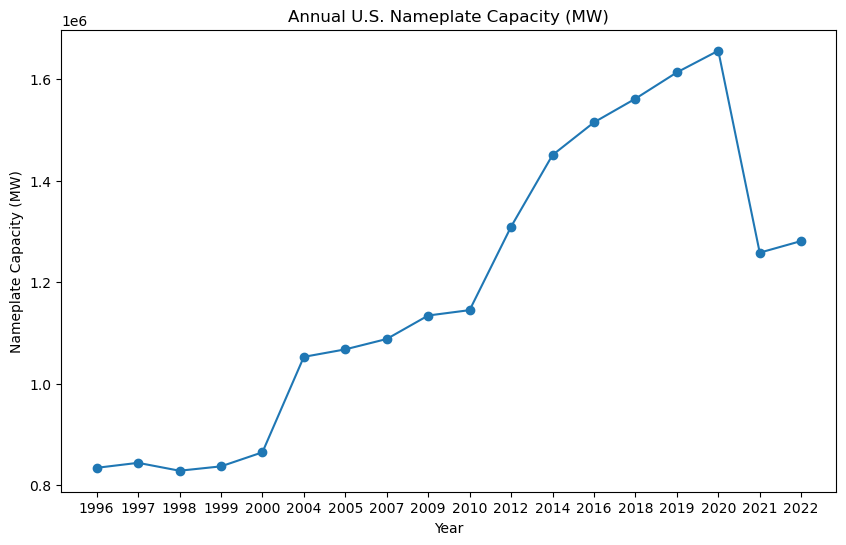

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(base_df.index, base_df['NAMEPCAP'], marker='o')
ax.set_title('Annual U.S. Nameplate Capacity (MW)')
ax.set_xlabel('Year')
ax.set_ylabel('Nameplate Capacity (MW)');

Consistent growth from 1996 to 2019. Sharp drop going into 2020. Wonder what the reason for this is. Could be due to COVID or potentially the presedential election. I wonder if any policies were implemented in 2020 which could be the reason for such a sharp drop. I'll have to explore that further when looking at the more granular data. Look at generation next.

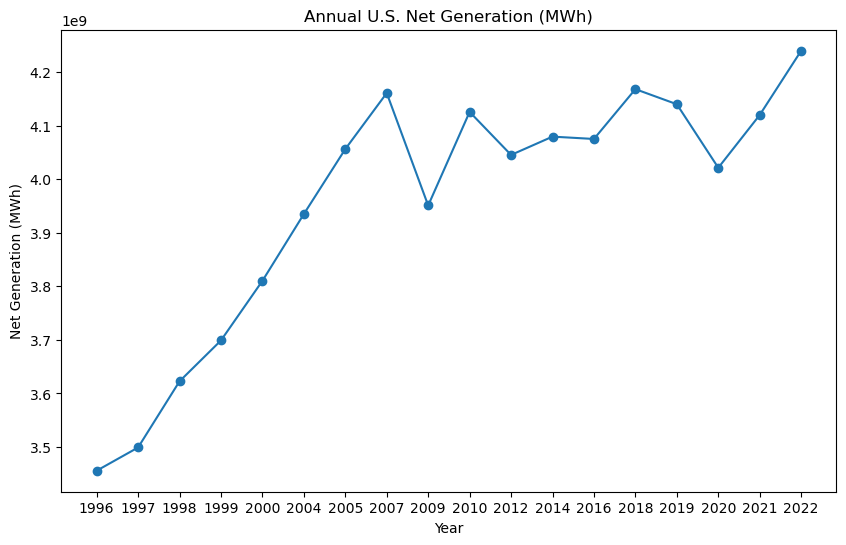

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(base_df.index, base_df['USNGENAN'], marker='o')
ax.set_title('Annual U.S. Net Generation (MWh)')
ax.set_xlabel('Year')
ax.set_ylabel('Net Generation (MWh)');

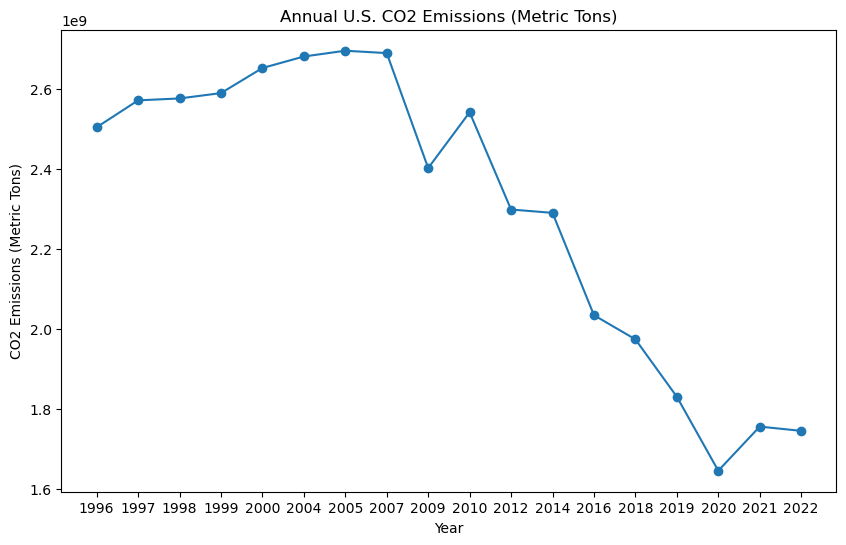

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(base_df.index, base_df['USCO2AN'], marker='o')
ax.set_title('Annual U.S. CO2 Emissions (Metric Tons)')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions (Metric Tons)');

Total CO2 emissions grew from 1996 to 2007 and have seen a pretty steady decline over the past decade and a half. I wonder if CO2 equivalent shows the same trend.

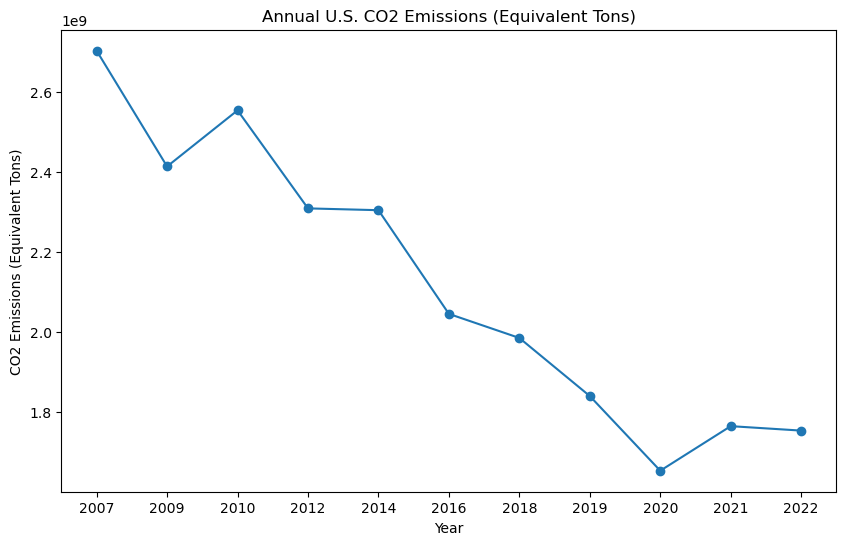

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(base_df.index, base_df['USCO2EQA'], marker='o')
ax.set_title('Annual U.S. CO2 Emissions (Equivalent Tons)')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions (Equivalent Tons)');

Similar trend in CO2 equivalent.

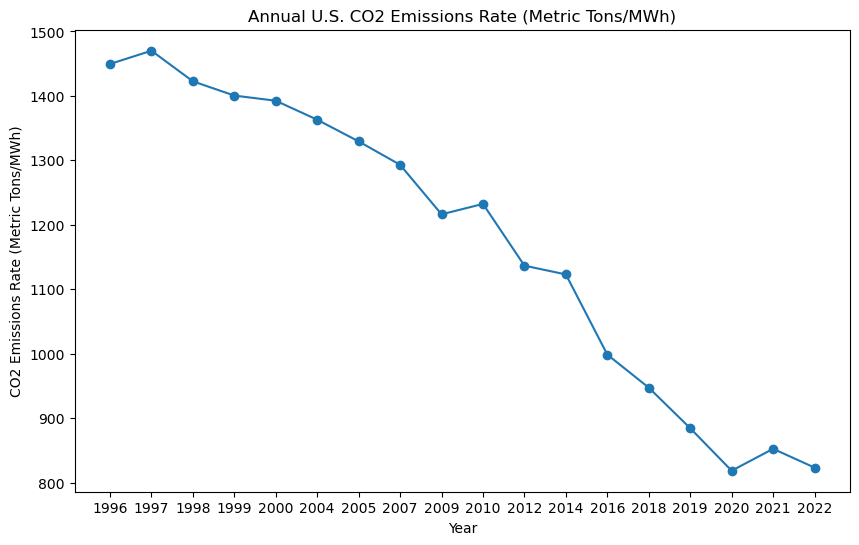

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(base_df.index, base_df['USCO2RTA'], marker='o')
ax.set_title('Annual U.S. CO2 Emissions Rate (Metric Tons/MWh)')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions Rate (Metric Tons/MWh)');

Steady decline in CO2 output emission rate. This is a good sign. It means we are transitioning to less CO2 intensive energy sources (renewables as well as natural gas vs coal). I will explore all of this further in the next notebook when I explore the data on a more granular level.